In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('training_mush.csv')

In [4]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [5]:
X_train = data.drop('class', axis=1)

In [6]:
y_train = data['class']

In [7]:
parametrs = {'n_estimators':range(10, 50, 10), 'max_depth':range(1, 12, 2), 'min_samples_leaf':range(1, 7),\
             'min_samples_split':range(2, 9, 2)}
rf = RandomForestClassifier(random_state=0)

In [8]:
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv = 3, n_jobs=-1, verbose=1)

In [9]:
grid_search_cv_clf.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [10]:
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [11]:
best_clf = grid_search_cv_clf.best_estimator_

In [12]:
feature_importances = best_clf.feature_importances_

In [13]:
feature_importances_df = pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})

In [14]:
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)

In [15]:
feature_importances_df.head()

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840


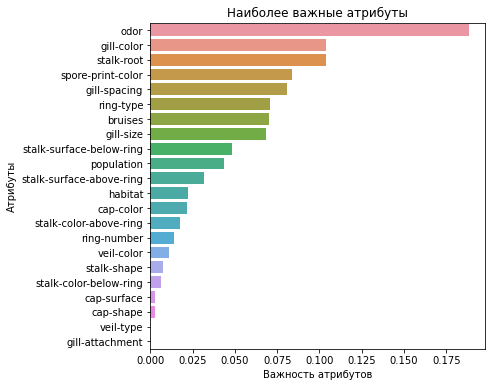

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [17]:
test = pd.read_csv('testing_mush.csv')

In [18]:
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [19]:
y_pred = best_clf.predict(test)

In [20]:
y_pred.sum()

976

In [21]:
pd.Series(y_pred).value_counts()

0    1055
1     976
dtype: int64

In [22]:
y = pd.read_csv('testing_y_mush.csv')

In [23]:
from sklearn.metrics import confusion_matrix

df = confusion_matrix(y, y_pred)

<AxesSubplot:>

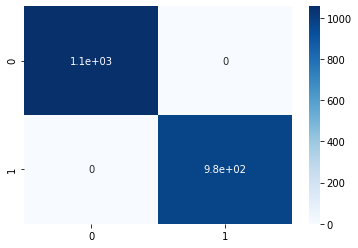

In [24]:
sns.heatmap(df, annot=True, cmap="Blues")

In [25]:
data_n = pd.read_csv('invasion.csv')

In [26]:
data_n.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [27]:
X_train = data_n.drop('class', axis=1)

In [28]:
y_train = data_n['class']

In [29]:
X_test = pd.read_csv('operative_information.csv')

In [30]:
parametrs = {'n_estimators':range(1, 20), 'max_depth':range(1, 13, 2), 'min_samples_leaf':range(1, 8)}
rf = RandomForestClassifier(criterion='gini')

In [31]:
grid_search_cv_clf = GridSearchCV(rf, parametrs, cv = 3, n_jobs=-1, verbose=1)
grid_search_cv_clf.fit(X_train, y_train)

Fitting 3 folds for each of 798 candidates, totalling 2394 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'n_estimators': range(1, 20)},
             verbose=1)

In [32]:
best_clf = grid_search_cv_clf.best_estimator_
y_pred = best_clf.predict(X_test)
pd.Series(y_pred).value_counts()

fighter      675
transport    594
cruiser      231
dtype: int64

In [33]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df = feature_importances_df.sort_values('feature_importances', ascending=False)

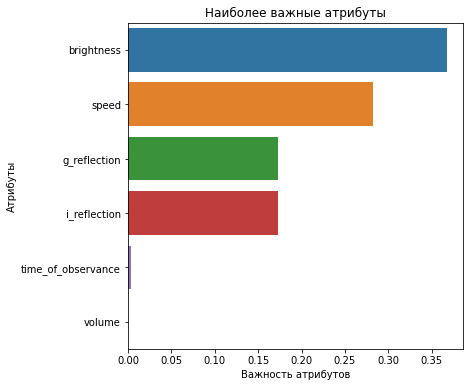

In [34]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [35]:
feature_importances_df.head()

,features,feature_importances
3,brightness,0.367631
2,speed,0.282511
0,g_reflection,0.173329
1,i_reflection,0.172672
4,time_of_observance,0.003857


In [36]:
data = pd.read_csv('space_can_be_a_dangerous_place.csv')

In [37]:
data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [38]:
data.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


<AxesSubplot:>

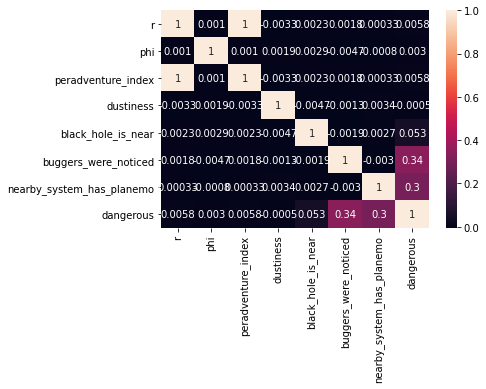

In [39]:
sns.heatmap(data.corr(), annot=True) 